# Fuzzy – Interview Challenge – Data Analyst
Zhengzhe Jia, 2022.02

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Questions 1, 2, and 3 deal with “InterviewData_Cost.csv” and “InterviewData_Rev.csv”.**
## (1) Join these two datasets by “date” and “source_id”, returning all rows from both regardless of whether there is a match between the two data sets.

In [ ]:
cost = pd.read_csv('/content/interviewdata-cost.csv', parse_dates=['date'])
rev = pd.read_csv('/content/interviewdata-rev.csv', parse_dates=['date'])
cost.head()

,date,source_id,cost
0,2014-10-17,PA0577,7168.0
1,2014-08-17,PA0354,7615.0
2,2014-01-07,PA0607,4054.0
3,2014-08-25,PA0745,9317.0
4,2014-11-30,PA0923,5586.0


In [ ]:
rev.head()

,date,source_id,revenue
0,2014-08-01,PA0368,5717.0
1,2014-01-31,PA0277,1380.0
2,2014-06-09,PA0745,7535.0
3,2014-09-01,PA0751,2868.0
4,2014-03-12,PA0859,10757.0


In [ ]:
print(cost.info())
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10000 non-null  datetime64[ns]
 1   source_id  10000 non-null  object        
 2   cost       9900 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10000 non-null  datetime64[ns]
 1   source_id  10000 non-null  object        
 2   revenue    9921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.5+ KB
None


In [ ]:
cost_rev = pd.merge(cost, rev, how='outer', on = ['date', 'source_id'])
cost_rev

,date,source_id,cost,revenue
0,2014-10-17,PA0577,7168.0,8417.0
1,2014-08-17,PA0354,7615.0,4200.0
2,2014-01-07,PA0607,4054.0,7935.0
3,2014-08-25,PA0745,9317.0,5536.0
4,2014-11-30,PA0923,5586.0,NaN
...,...,...,...,...
14613,2014-12-29,PA0958,NaN,7406.0
14614,2014-03-19,PA0732,NaN,6584.0
14615,2014-09-24,PA0174,NaN,3827.0
14616,2014-10-26,PA0318,NaN,533.0


### (2) Join these two datasets by “date” and “source_id”, returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.


In [ ]:
cost_rev[cost_rev['revenue'].isnull()]

,date,source_id,cost,revenue
4,2014-11-30,PA0923,5586.0,NaN
6,2014-12-17,PA0952,6662.0,NaN
7,2014-05-22,PA0411,4795.0,NaN
9,2014-10-14,PA0168,9651.0,NaN
10,2014-02-13,PA0354,2752.0,NaN
...,...,...,...,...
13479,2014-02-14,PA0470,NaN,NaN
13640,2014-11-28,PA0534,NaN,NaN
13824,2014-08-14,PA0619,NaN,NaN
14194,2014-12-03,PA0368,NaN,NaN


### (3) Using your result from #1: 

### a. What are the Top 4 sources (“source_id” values) in terms of total revenue generation across this data set?


In [ ]:
top_four_sum = cost_rev.groupby(['source_id']).sum().sort_values(['revenue'], ascending = False).head(4)
top_four_sum[['revenue']]

,revenue
source_id,
PA0527,1385747.0
PA0308,1338615.0
PA0352,1309685.0
PA0552,1283190.0


In [ ]:
print('The top 4 sources are ' + str(list(top_four_sum.index))[1:-1])

The top 4 sources are 'PA0527', 'PA0308', 'PA0352', 'PA0552'


### b. How would you visualize the monthly revenue for those Top 4 sources?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

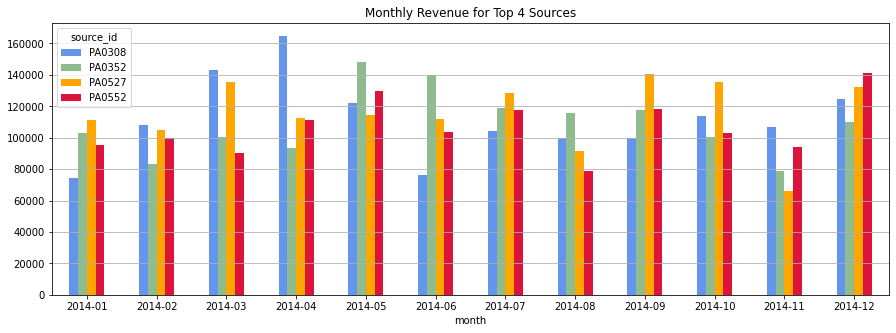

In [ ]:
top_four = cost_rev[cost_rev.source_id.isin(list(top_four_sum.index))]
top_four['month'] = top_four.date.dt.strftime('%Y-%m')
top_four.groupby(['month','source_id']).sum()['revenue'].unstack().plot.bar(
    figsize=(15,5),  
    color=['cornflowerblue','darkseagreen','orange','crimson'],
    title = 'Monthly Revenue for Top 4 Sources')
plt.grid(axis = 'y')
plt.xticks(rotation=0)

**Questions 4 and 5 deal with “InterviewData_Activity.csv”.**
### (4) In either R or Python, read the data into an object called `activity_data`, and then build a vanilla logistic regression model to predict activity. That is, predict activity using just age, gender, metropolitan area, and device type. Depending on your choice of language and package to build the regression, you may need to convert some of the categorical variables such as gender. Given this vanilla logistic regression model, assess the prediction accuracy.

In [ ]:
activity_data = pd.read_csv('/content/InterviewData_Activity.csv')
print(activity_data.info())
activity_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   userid             5420 non-null   object
 1   date               5420 non-null   object
 2   age                5420 non-null   int64 
 3   gender             5420 non-null   object
 4   metropolitan_area  5420 non-null   object
 5   device_type        5420 non-null   object
 6   active             5420 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 296.5+ KB
None


,userid,date,age,gender,metropolitan_area,device_type,active
0,4e3a9ea937b3a,8/4/15,30,F,Detroit,Tablet,1
1,4e3dd5154a08c,8/6/15,43,F,Charlotte,Desktop,1
2,4e3df1ecd131a,8/6/15,41,F,Tampa,Mobile,1
3,4e4e77461b1e3,8/19/15,56,F,Nashville,Desktop,1
4,4e4eb59b6de55,8/19/15,33,F,Detroit,Mobile,1


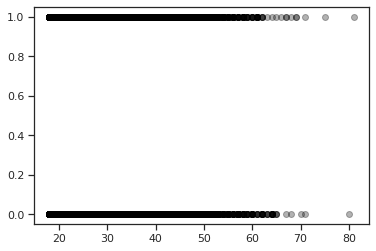

In [ ]:
plt.plot(activity_data['age'], activity_data['active'], 'o', color='black', alpha = 0.3);

In [ ]:
# check duplicates
len(activity_data['userid'].unique())

5420

In [ ]:
# check numeric cols
activity_data.describe()

,age,active
count,5420.000000,5420.000000
mean,33.302768,0.485240
std,10.935586,0.499828
min,18.000000,0.000000
25%,24.000000,0.000000
50%,31.500000,0.000000
75%,41.000000,1.000000
max,81.000000,1.000000


In [ ]:
# check non-numeric cols
cols_l = ['gender', 'metropolitan_area','device_type','active']
for i in cols_l:
  print('\n>> ' + i)
  print(activity_data[i].value_counts())


>> gender
F    4651
M     769
Name: gender, dtype: int64

>> metropolitan_area
Houston       1561
Birmingham    1246
Tampa          803
Austin         730
Detroit        551
Mobile         422
Charlotte       76
Nashville       31
Name: metropolitan_area, dtype: int64

>> device_type
Mobile     3249
Tablet     1790
Desktop     381
Name: device_type, dtype: int64

>> active
0    2790
1    2630
Name: active, dtype: int64


In [ ]:
# basic logistic regression
# data conversion
activity_r = activity_data[['active','age']]
activity_r['gender'] = pd.get_dummies(activity_data['gender'])[['F']]
activity_r[['Desktop','Mobile','Tablet']] = pd.get_dummies(activity_data['device_type'])
metro_cols = pd.get_dummies(activity_data['metropolitan_area'])
activity_r[list(metro_cols.columns)] = metro_cols
activity_r = sm.add_constant(activity_r, prepend=False)
activity_r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,active,age,gender,Desktop,Mobile,Tablet,Austin,Birmingham,Charlotte,Detroit,Houston,Nashville,Tampa,const
0,1,30,1,0,0,1,0,0,0,1,0,0,0,1.0
1,1,43,1,1,0,0,0,0,1,0,0,0,0,1.0
2,1,41,1,0,0,0,0,0,0,0,0,0,1,1.0
3,1,56,1,1,0,0,0,0,0,0,0,1,0,1.0
4,1,33,1,0,0,0,0,0,0,1,0,0,0,1.0


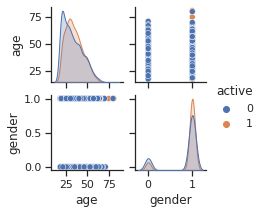

In [ ]:
import seaborn as sns
sns.set(style = 'ticks', color_codes = True)
sns.pairplot(activity_r[['active','age','gender']], hue='active',height=1.5,aspect=1)

In [ ]:
# regression model
vlr = sm.GLM(activity_r['active'], # y
             activity_r.iloc[:,1:], # x
             family=sm.families.Binomial())
r = vlr.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 5420
Model:                            GLM   Df Residuals:                     5408
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3613.1
Date:                Sun, 27 Feb 2022   Deviance:                       7226.3
Time:                        23:51:35   Pearson chi2:                 5.38e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0136      0.003      5.180      0.000       0.008       0.019
gender         0.6103      0.083      7.343      0.000       0.447       0.773
Desktop        1.5004      0.264      5.685      0.000       0.983       2.018
Mobile        -3.8769   1496.262     -0.003      0.998   -2936.497    2928.743
Tablet         0.2662      0.063      4.226      0.000       0.143       0.390
Austin        -2.1526   1496.262     -0.001      0.999   -2934.772    2930.467
Birmingham    -2.2072   1496.262     -0.001      0.999   -2934.827    2930.412
Charlotte     -4.0145   1496.262     -0.003      0.998   -2936.634    2928.605
Detroit       -2.2318   1496.262     -0.001      0.999   -2934.851    2930.388
Houston       -2.6022   1496.262     -0.002      0.999   -2935.222    2930.017
Nashville     20.2980    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Tampa         -2.0155   1496.262     -0.001      0.999   -2934.635    2930.604
const          1.1972   1496.262      0.001      0.999   -2931.422    2933.817
==============================================================================
"""

In [ ]:
# prediction accuracy
pred = r.predict(activity_r.iloc[:,1:])
pred_nom = [1 if x > 0.5 else 0 for x in pred]
acc = metrics.accuracy_score(activity_r['active'], pred_nom)
print('The prediction accuracy is ' + str(acc*100)[:5] + '%.')

The prediction accuracy is 58.06%.


### (5) Split the data into training and test samples by separating the first 4000 rows into training data, and build a model over the new training data. Assess the training data model's accuracy on the test data.How and why does the accuracy differ compared to (4)?

In [ ]:
# split data into training and test samples
activity_train = activity_r[:4000]
activity_test = activity_r[4000:]
tlr = sm.GLM(activity_train['active'],
             activity_train.iloc[:,1:],
             family=sm.families.Binomial())
r_t = tlr.fit()
r_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 4000
Model:                            GLM   Df Residuals:                     3988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.0
Date:                Sun, 27 Feb 2022   Deviance:                       5110.0
Time:                        23:51:35   Pearson chi2:                 3.97e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0071      0.003      2.224      0.026       0.001       0.013
gender         0.5807      0.097      5.986      0.000       0.391       0.771
Desktop        1.5819      0.291      5.428      0.000       1.011       2.153
Mobile        -3.7497   1472.892     -0.003      0.998   -2890.565    2883.065
Tablet         0.2998      0.076      3.953      0.000       0.151       0.448
Austin        -1.9892   1472.892     -0.001      0.999   -2888.804    2884.826
Birmingham    -2.1081   1472.892     -0.001      0.999   -2888.923    2884.707
Charlotte     -3.7725   1472.892     -0.003      0.998   -2890.588    2883.043
Detroit       -2.1251   1472.892     -0.001      0.999   -2888.940    2884.690
Houston       -2.4760   1472.892     -0.002      0.999   -2889.291    2884.339
Nashville     19.8718   1.18e+04      0.002      0.999   -2.31e+04    2.31e+04
Tampa         -1.7998   1472.892     -0.001      0.999   -2888.615    2885.015
const          1.8514   1472.892      0.001      0.999   -2884.964    2888.667
==============================================================================
"""

In [ ]:
# prediction accuracy
pred_test = r_t.predict(activity_test.iloc[:,1:])
pred_test_nom = [1 if x > 0.5 else 0 for x in pred_test]
acc_test = metrics.accuracy_score(activity_test['active'], pred_test_nom)
print('The prediction accuracy is ' + str(acc_test*100)[:5] + '%.')

The prediction accuracy is 21.12%.


The prediction accuracy of the second model is much smaller than the first model. This is because the first model was trained and evaluated using the same data, whereas the second model used different data (training and test samples). This is called **overfitting**, where the production of the second model corresponds too closely to the training sample and fails to fit the additional data(the testing sample). 

**Question 6 deals with "InterviewData_Parsing.csv".**

### (6) This data comes from a subset of userdata JSON blobs stored in our database. Parse out the values (stored in the "data_to_parse" column) into four separate columns. So for example, the four additional columns for the first entry would have values of "N", "U", "A7", and "W". You can use any R functions/ packages you want for this.

In [ ]:
parsing = pd.read_csv('/content/interviewdata-parsing.csv')
parsing.head()

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


In [ ]:
parsing[['C1','C2','C3','C4']] = parsing['data_to_parse'].str[:-3].str[9:].str.split(';', expand=True)
parsing.head()

,userid,data_to_parse,C1,C2,C3,C4
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W


### Additional Questions - Pick One
**(B) One of the ways we attract new members is through digital marketing campaigns (e.g., on Facebook). Assume that we know a little bit about potential users who see an ad for Fuzzy on Facebook – things like name and general metropolitan area, and then can measure the impressions on the ad, clicks to our landing page, and then conversions on our landing page. Our goal then is to drive more conversions on the landing page. What are some ways you might look at the already collected data (or some ways to enrich the existing data set) to try and make recommendations to the Marketing team for how to optimize their campaigns?**

To increase the conversion rate and make better use of digital marketing campaigns, I will check the efficiency of the marketing pipeline and perform user analysis to optimize the campaigns. For the first part, I assume that user id, traffic info, impression info, click info, and conversion rate are available for the first part. For the second part, I will use user-related data like metropolitan areas.

The marketing pipeline is defined as traffic delivery, user impression, page click, and final conversion. The efficiency of each stage can be calculated to evaluate and understand user behaviour, like traffic/impression rate, impression/click rate, click/conversion rate. These data should be compared with benchmark rates provided by Facebook. Facebook must have different products and corresponding expected conversion rates. We can compare the performance of Fuzzy with other online health care services or e-commerce webs, depending on the type of the ads, to find out the section that can be improved. 

With visitor information like metropolitan areas, we can evaluate the marketing performance in different areas/groups and check if we reach out to and attract our target users. That information can be age, gender, income, living conditions, and so on. These can tell us who might be our potential users and where we can improve to reach our target users. 

With the results from the above analyses, I will suggest that A/B testing is used to check different marketing changes and improvements. A/B testing lets you change variables, such as ad creative, audience, or placement to determine which strategy performs best and improve future campaigns and lets you quickly compare both strategies to see which one performs best.

In [ ]:
# pip install nbconvert
%%shell
jupyter nbconvert --to html /content/Fuzzy.ipynb

[NbConvertApp] Converting notebook /content/Fuzzy.ipynb to html
[NbConvertApp] Writing 390731 bytes to /content/Fuzzy.html
